Big Data или большие данные — это структурированные или неструктурированные массивы данных большого объема. Их обрабатывают при помощи специальных автоматизированных инструментов, чтобы использовать для статистики, анализа, прогнозов и принятия решений.

Dask – это гибкая библиотека для параллельных вычислений на Python. Она прекрасно взаимодействует с другими открытыми проектами, такими как NumPy, Pandas, и scikit-learn. В Dask есть структура массивов, которая эквивалентна массивам в NumPy, датафреймы в Dask аналогичны датафреймам в Pandas, а Dask-ML – это аналог scikit-learn.

In [69]:
pip install "dask[complete]"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [124]:
pip install dask

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Dask Array работает с очень большими массивами, разделяя их на куски и выполняя эти блоки параллельно.

Dask Array может читать из любого массива

In [71]:
import pandas as pd
import glob
import dask.dataframe as dd

Граф выполнения Dask при чтении нескольких файлов

Датафрейм Dask состоит из нескольких датафреймов pandas, которые разделены по индексам. Когда мы выполняем функцию read_csv из Dask, выполняется чтение одного и того же файла несколькими процессами.

Чтение CSV-файлов

ЕСли есть много CSV-файлов , мы можем прочитать их все как один логический кадр данных, используя dd.read_csv функцию со строкой glob.

Мы можем прочитать один файл с помощью pandas.read_csv или несколько файлов с помощьюdask.dataframe.read_csv

Читать с Паркета

Всякий раз, когда мы работаем с нашим фреймом данных, мы читаем все наши данные CSV, чтобы не заполнять ОЗУ. Это очень эффективно для использования памяти, но чтение всех файлов CSV каждый раз может быть медленным.

Вместо этого можно хранить наши данные в формате Parquet, который более эффективен для компьютеров при чтении и записи.

Parquet — это хранилище столбцов, что означает, что он может эффективно извлекать только несколько столбцов из вашего набора данных. Это хорошо, потому что помогает избежать ненужной загрузки данных.

In [72]:
!python -m pip install "dask[complete]"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [73]:
import pandas as pd
import json
from pandas import json_normalize

Парсинг данных

In [74]:
import dask.dataframe as dd

In [75]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [76]:
data = pd.read_csv('/content/drive/MyDrive/airport-codes.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57421 entries, 0 to 57420
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ident         57421 non-null  object 
 1   type          57421 non-null  object 
 2   name          57421 non-null  object 
 3   elevation_ft  49608 non-null  float64
 4   continent     28978 non-null  object 
 5   iso_country   57175 non-null  object 
 6   iso_region    57421 non-null  object 
 7   municipality  51527 non-null  object 
 8   gps_code      41561 non-null  object 
 9   iata_code     9225 non-null   object 
 10  local_code    30030 non-null  object 
 11  coordinates   57421 non-null  object 
dtypes: float64(1), object(11)
memory usage: 5.3+ MB


In [77]:
data.head()

,ident,type,name,elevation_ft,continent,iso_country,iso_region,municipality,gps_code,iata_code,local_code,coordinates
0,00A,heliport,Total Rf Heliport,11.0,NaN,US,US-PA,Bensalem,00A,NaN,00A,"-74.93360137939453, 40.07080078125"
1,00AA,small_airport,Aero B Ranch Airport,3435.0,NaN,US,US-KS,Leoti,00AA,NaN,00AA,"-101.473911, 38.704022"
2,00AK,small_airport,Lowell Field,450.0,NaN,US,US-AK,Anchor Point,00AK,NaN,00AK,"-151.695999146, 59.94919968"
3,00AL,small_airport,Epps Airpark,820.0,NaN,US,US-AL,Harvest,00AL,NaN,00AL,"-86.77030181884766, 34.86479949951172"
4,00AR,closed,Newport Hospital & Clinic Heliport,237.0,NaN,US,US-AR,Newport,NaN,NaN,NaN,"-91.254898, 35.6087"


In [78]:
data.tail()

,ident,type,name,elevation_ft,continent,iso_country,iso_region,municipality,gps_code,iata_code,local_code,coordinates
57416,ZYYK,medium_airport,Yingkou Lanqi Airport,0.0,AS,CN,CN-21,Yingkou,ZYYK,YKH,NaN,"122.3586, 40.542524"
57417,ZYYY,medium_airport,Shenyang Dongta Airport,NaN,AS,CN,CN-21,Shenyang,ZYYY,NaN,NaN,"123.49600219726562, 41.784400939941406"
57418,ZZ-0001,heliport,Sealand Helipad,40.0,EU,GB,GB-ENG,Sealand,NaN,NaN,NaN,"1.4825, 51.894444"
57419,ZZ-0002,small_airport,Glorioso Islands Airstrip,11.0,AF,TF,TF-U-A,Grande Glorieuse,NaN,NaN,NaN,"47.296388888900005, -11.584277777799999"
57420,ZZZZ,small_airport,Satsuma IÅjima Airport,338.0,AS,JP,JP-46,Mishima-Mura,RJX7,NaN,RJX7,"130.270556, 30.784722"


In [79]:
data.to_parquet('11.parquet', engine='pyarrow')

In [80]:
df = dd.read_parquet('11.parquet', columns=['name', 'coordinates'], engine='pyarrow')
df.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 2 entries, name to coordinates
dtypes: object(2)

In [81]:
df.head()

,name,coordinates
0,Total Rf Heliport,"-74.93360137939453, 40.07080078125"
1,Aero B Ranch Airport,"-101.473911, 38.704022"
2,Lowell Field,"-151.695999146, 59.94919968"
3,Epps Airpark,"-86.77030181884766, 34.86479949951172"
4,Newport Hospital & Clinic Heliport,"-91.254898, 35.6087"


In [82]:
df.tail()

,name,coordinates
57416,Yingkou Lanqi Airport,"122.3586, 40.542524"
57417,Shenyang Dongta Airport,"123.49600219726562, 41.784400939941406"
57418,Sealand Helipad,"1.4825, 51.894444"
57419,Glorioso Islands Airstrip,"47.296388888900005, -11.584277777799999"
57420,Satsuma IÅjima Airport,"130.270556, 30.784722"


In [83]:
df.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 2 entries, name to coordinates
dtypes: object(2)

In [84]:
from math import isnan

In [104]:
data = dd.read_csv('/content/drive/MyDrive/airport-codes.csv', dtype={'continent': 'object', 'elevation_ft': 'object', 'iata_code': 'object'})

Конкатенация

In [105]:
df1 = dd.concat([df, data], axis=1)

In [106]:
df1.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 14 entries, name to coordinates
dtypes: object(14)

In [107]:
df1.head()

,name,coordinates,ident,type,name,elevation_ft,continent,iso_country,iso_region,municipality,gps_code,iata_code,local_code,coordinates
0,Total Rf Heliport,"-74.93360137939453, 40.07080078125",00A,heliport,Total Rf Heliport,11,NaN,US,US-PA,Bensalem,00A,NaN,00A,"-74.93360137939453, 40.07080078125"
1,Aero B Ranch Airport,"-101.473911, 38.704022",00AA,small_airport,Aero B Ranch Airport,3435,NaN,US,US-KS,Leoti,00AA,NaN,00AA,"-101.473911, 38.704022"
2,Lowell Field,"-151.695999146, 59.94919968",00AK,small_airport,Lowell Field,450,NaN,US,US-AK,Anchor Point,00AK,NaN,00AK,"-151.695999146, 59.94919968"
3,Epps Airpark,"-86.77030181884766, 34.86479949951172",00AL,small_airport,Epps Airpark,820,NaN,US,US-AL,Harvest,00AL,NaN,00AL,"-86.77030181884766, 34.86479949951172"
4,Newport Hospital & Clinic Heliport,"-91.254898, 35.6087",00AR,closed,Newport Hospital & Clinic Heliport,237,NaN,US,US-AR,Newport,NaN,NaN,NaN,"-91.254898, 35.6087"


In [108]:
data2= df1.fillna(0)

In [109]:
data2.head()

,name,coordinates,ident,type,name,elevation_ft,continent,iso_country,iso_region,municipality,gps_code,iata_code,local_code,coordinates
0,Total Rf Heliport,"-74.93360137939453, 40.07080078125",00A,heliport,Total Rf Heliport,11,0,US,US-PA,Bensalem,00A,0,00A,"-74.93360137939453, 40.07080078125"
1,Aero B Ranch Airport,"-101.473911, 38.704022",00AA,small_airport,Aero B Ranch Airport,3435,0,US,US-KS,Leoti,00AA,0,00AA,"-101.473911, 38.704022"
2,Lowell Field,"-151.695999146, 59.94919968",00AK,small_airport,Lowell Field,450,0,US,US-AK,Anchor Point,00AK,0,00AK,"-151.695999146, 59.94919968"
3,Epps Airpark,"-86.77030181884766, 34.86479949951172",00AL,small_airport,Epps Airpark,820,0,US,US-AL,Harvest,00AL,0,00AL,"-86.77030181884766, 34.86479949951172"
4,Newport Hospital & Clinic Heliport,"-91.254898, 35.6087",00AR,closed,Newport Hospital & Clinic Heliport,237,0,US,US-AR,Newport,0,0,0,"-91.254898, 35.6087"


Фильтрация

In [110]:
continent = data[data['continent']=='EU']

In [111]:
continent[['name', 'continent']].head()

,name,continent
10422,RAF Calveley,EU
10423,RNAS/RAF Calshot,EU
10426,CamÃ­ Heliport,EU
10427,Andorra la Vella Heliport,EU
10429,RAF Castletown,EU


In [112]:
!pip install dask-searchcv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 40 kB 4.9 MB/s 


In [113]:
columns1 = ['heliport', 'small_airport']

In [114]:
data.groupby(['iso_country', 'type']).size()

Dask Series Structure:
npartitions=1
    int64
      ...
dtype: int64
Dask Name: dataframe-groupby-size-agg, 3 tasks

In [ ]:
ddf_selected = data.loc[data['type']]

In [116]:
import matplotlib.pyplot as plt

In [117]:
import seaborn as sns

In [118]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import numpy as np
import pandas.tseries
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


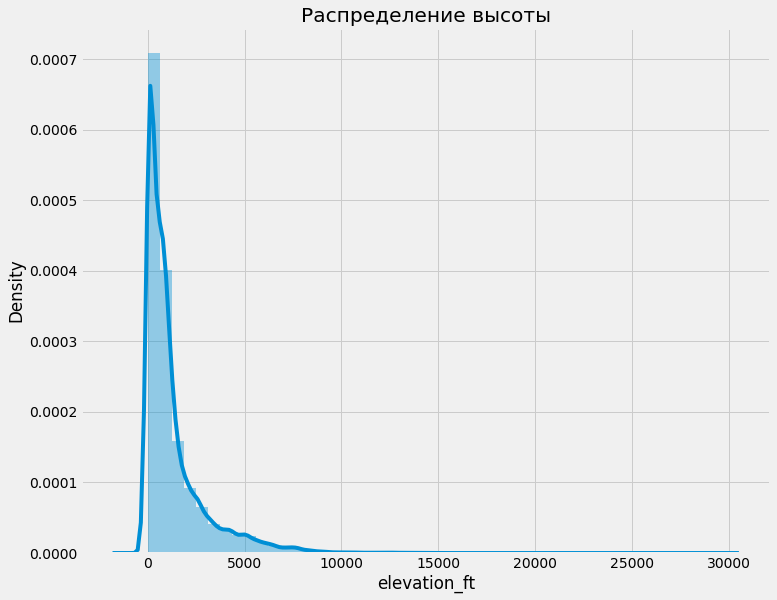

In [119]:
f, ax = plt.subplots(figsize =(11,9))
plt.title("Распределение высоты")
sns.distplot(data.elevation_ft)
plt.show()